# Reanalysis of $^{70}Zn$

In [3]:
import ompy as om
from pathlib import Path
%matplotlib notebook

ModuleNotFoundError: No module named 'ompy'

In [2]:
#plt.style.use('fast')

In [3]:
root = Path("../../70Zn/matrices/")
firstgenpath = root / 'firstgen.npy'

In [4]:
firstgen = om.Matrix(path=firstgenpath)
print(firstgen.dEx, firstgen.dEg)
cut = om.Action().trapezoid(Ex_min='5 MeV', Ex_max='9.2 MeV', Eg_min='1 MeV')
cut.act_on(firstgen)
firstgen.rebin('both', binwidth='50 keV', inplace=True)
print(firstgen.dEx, firstgen.dEg)

The rebinning resizes the energy vector.


12.012012012012015 kiloelectron_volt 12.012012012012015 kiloelectron_volt


The rebinning resizes the energy vector.


50.0 kiloelectron_volt 50.0 kiloelectron_volt


<IPython.core.display.Javascript object>


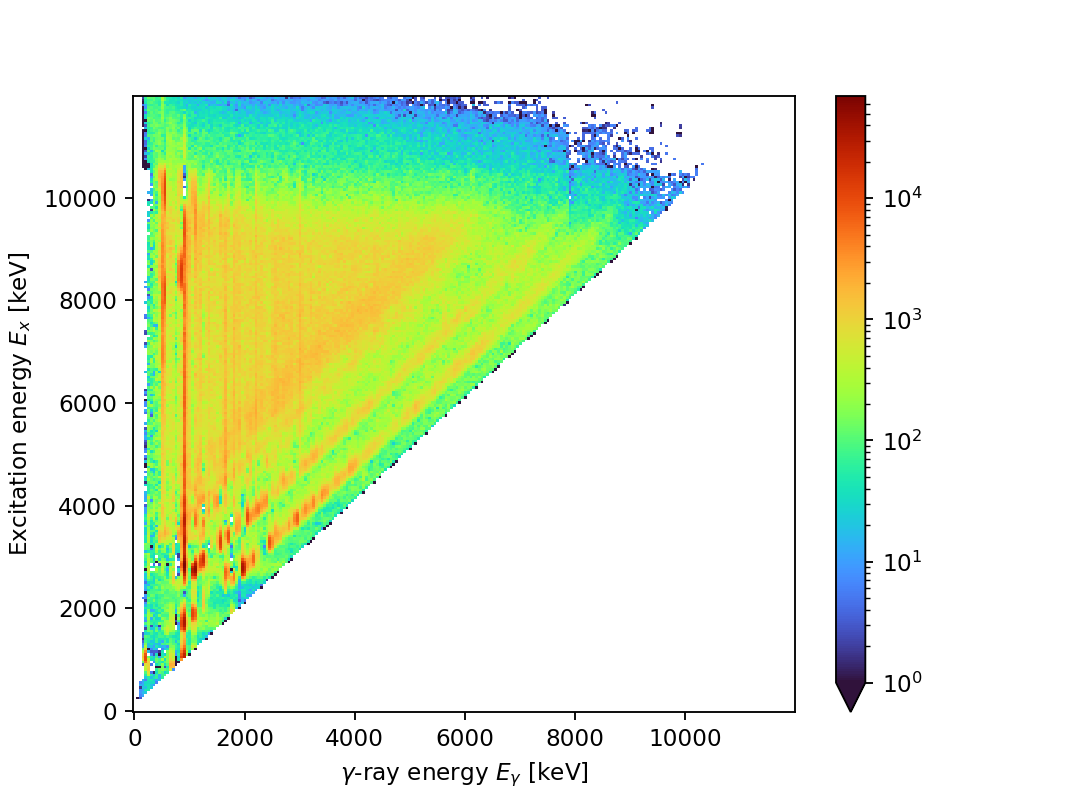

(<matplotlib.collections.QuadMesh at 0x7f215e8e6d30>,
 <AxesSubplot:xlabel='$\\gamma$-ray energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>,
 <Figure size 640x480 with 2 Axes>)

In [5]:
firstgen.plot(cmap='turbo', vmin=1)

<IPython.core.display.Javascript object>


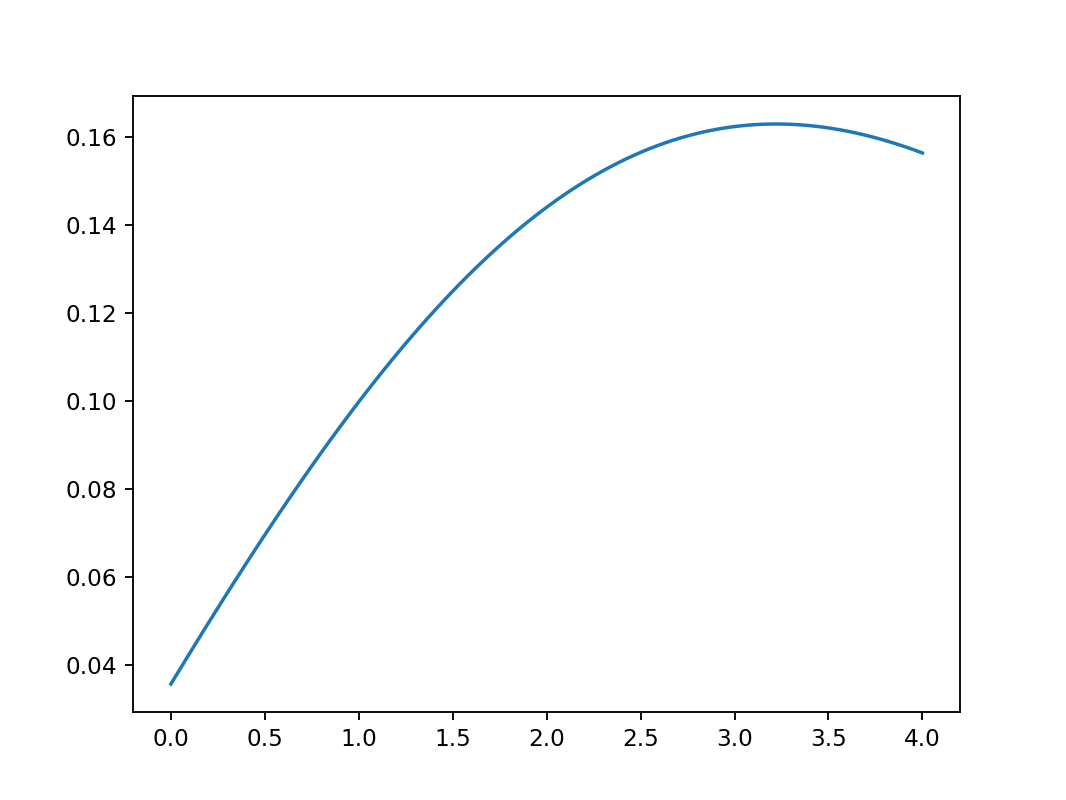

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

In [6]:
pars = {"mass":70, "NLDa":9.311, "Eshift":0.876, 'Pa_prime':  2.486,
        "Sn": 9.2184, "sigma2_disc":[1.5, 3.6]}
spf = om.SpinFunctions(Ex=[6], J=np.linspace(0, 4, 100), model='EB05', pars=pars)
spf.plot()

<IPython.core.display.Javascript object>


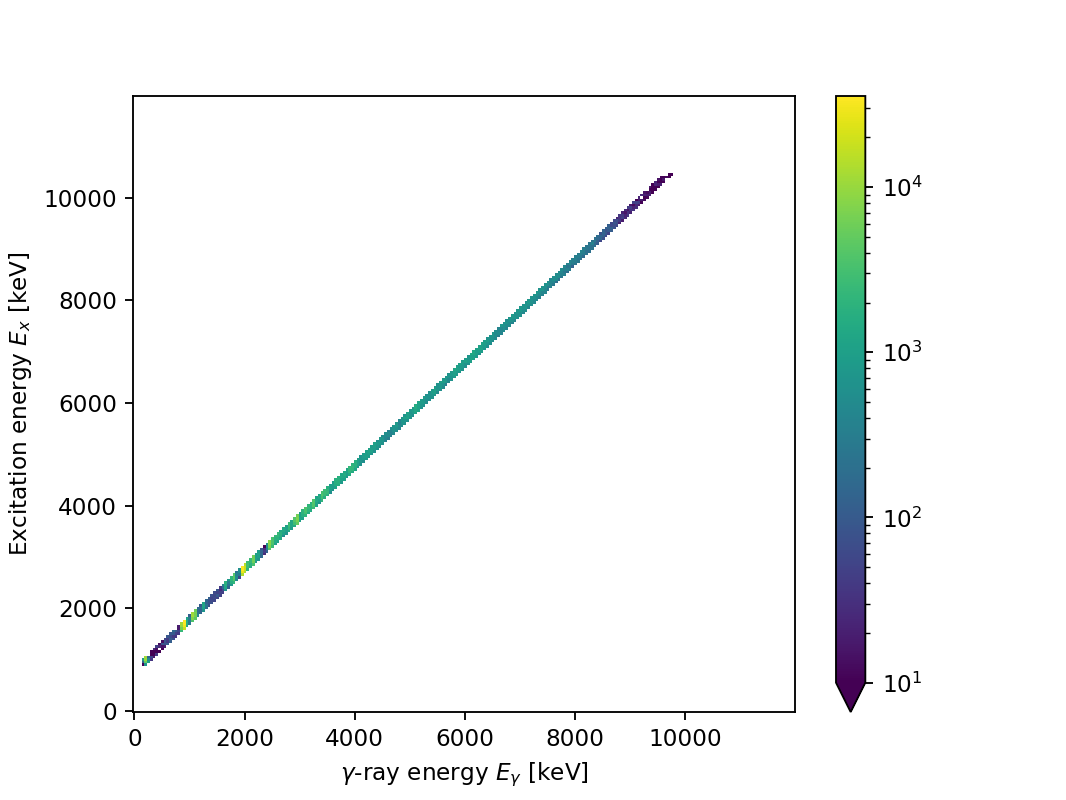

<IPython.core.display.Javascript object>


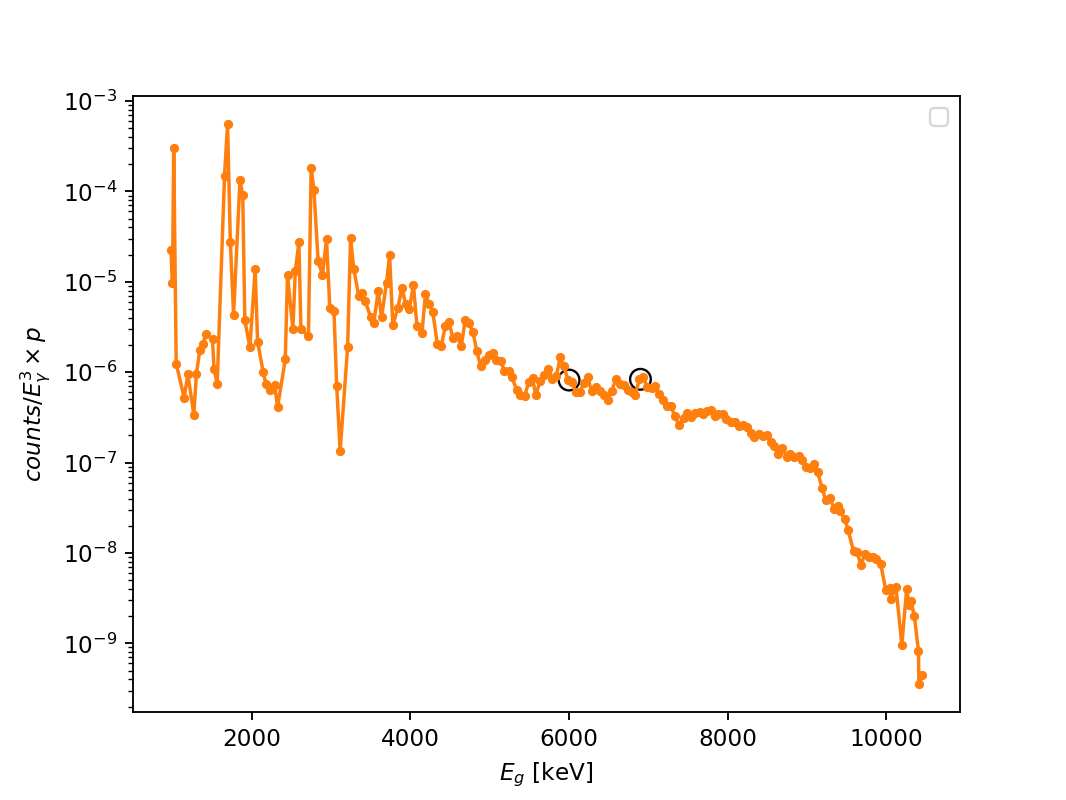

No handles with labels found to put in legend.


Ratio: nan


<IPython.core.display.Javascript object>


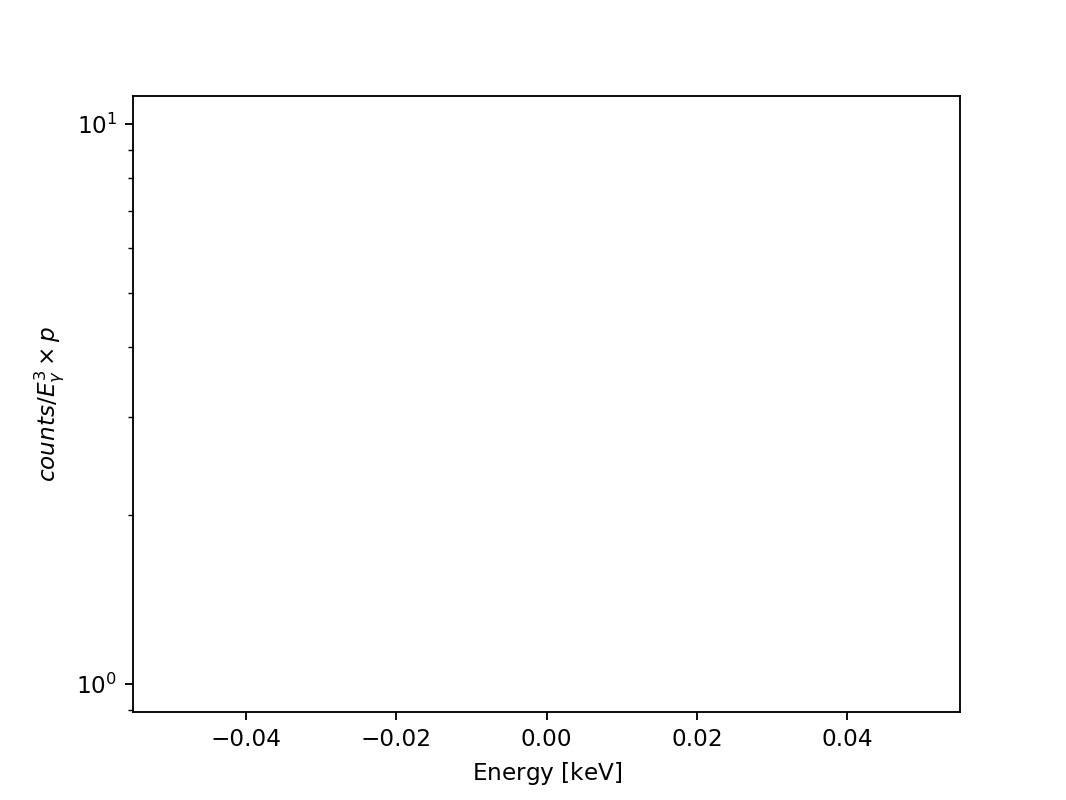

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Energy [$\\mathrm{keV}$]', ylabel='$counts / E_{\\gamma}^3\\times p $'>)

In [16]:
#mat = mat.rebin(axis=0, factor=2, inplace=False).rebin(axis=0, factor=2, inplace=False)
log = om.introspection.get_logger('shape', 'INFO')
shape = om.Shape(firstgen)
shape.spinmodel = spf
shape.add_diagonal(spin=0, parity=+1, thickness=5)
shape.add_diagonal(spin=2, parity=+1, thickness=5, points=[(1975, 2800)])
#shape.add_diagonal(spin=0, parity=+1, thickness=5, points=[(1254, 2953.7)])
shape.plot_diagonals(vmin=1e1)
shape.plot_unsewed(scale='linear')
#gsf_lin = shape.compute_gsf(kind='linear')
#shape.compute_gsf(kind='log')
shape.plot()
#slope = shape.fit([5500, 9000])
#print("Slope = ", slope)
#fig, ax = shape.plot(kind='step', scale='log', linewidth=1)
#gsf_lin.plot(ax=ax, kind='step', scale='log', label='Linear sew')
#ax.legend()

In [18]:
om.u('0.002 MeV')

0.002 <Unit('megaelectron_volt')>

In [22]:
om.ureg.Quantity('1 eV +1 MeV')

1000001.0 <Unit('electron_volt')>

In [32]:
def one(x=10):
    a = 1
    with om.Model() as model:
        x = 6
        y = 10
    return model
        
def two(x=15):
    def foo():
        with om.Model() as model:
            x = 7
            y = 4
        return model
    return foo()

print(one())
print(two())

IN ENTER
{'x': 10, 'a': 1}
LEAVE ENTER
<<<<<
{'x': 6, 'a': 1, 'model': {'x': 5, 'a': 8}, 'y': 10}
====
{'x': 6, 'a': 1, 'model': {'x': 5, 'a': 8}, 'y': 10}
>>>>>
{'x': 6, 'a': 1, 'model': {'x': 5, 'a': 8}, 'y': 10}
<><><><>
x 6
a 1
model {'x': 6, 'a': 1}
y 10
{'x': 6, 'a': 1}
IN ENTER
{}
LEAVE ENTER
<<<<<
{'model': {'x': 5, 'a': 8}, 'x': 7, 'y': 4}
====
{'model': {'x': 5, 'a': 8}, 'x': 7, 'y': 4}
>>>>>
{'model': {'x': 5, 'a': 8}, 'x': 7, 'y': 4}
<><><><>
model {'x': 5, 'a': 8}
x 7
y 4
Key a is unchanged
{'x': 7, 'a': 8}


In [28]:
import inspect

In [13]:
x = 6
with om.Model() as model:
    model.x = 7

x <> 7
a = 8


In [35]:
om

{'x': 5, 'a': 8}